In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('imageset_gray.csv')
print(df.shape)

(1384, 7501)


In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,y
0,133,134,134,134,134,135,134,134,133,134,...,152,152,151,151,151,151,151,150,150,0
1,134,135,136,137,137,137,136,136,137,137,...,153,153,152,152,152,152,152,152,152,0
2,137,135,134,134,135,136,136,135,135,135,...,151,150,150,150,150,150,150,149,149,0
3,140,141,141,141,141,141,141,141,142,142,...,158,158,157,157,158,157,157,157,157,0
4,160,160,160,160,160,161,161,160,160,160,...,174,175,175,175,175,175,175,176,176,0


(-0.5, 99.5, 74.5, -0.5)

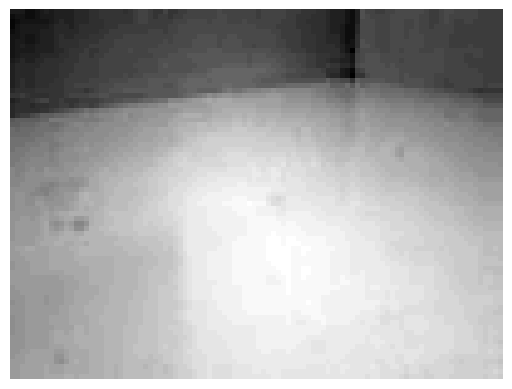

In [3]:
import numpy as np
some_image = df.loc[1000,df.columns[:-1]]
#print(type(some_image)) 
some_image_np = some_image.to_numpy()
#print(type(some_image_np))

plt.imshow(np.reshape(some_image_np, (75,100)), cmap='gray')
plt.axis('off')

In [4]:
X = df.drop(columns={'y'})
y = df['y']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

In [6]:
print(y_train.value_counts())
print(y_test.value_counts())

y
3    369
1    369
0    369
Name: count, dtype: int64
y
3    93
0    92
1    92
Name: count, dtype: int64


In [7]:
from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier(random_state=42, penalty='l1') #se quiser reproduzir os resultados
model_sgd.fit(X_train, y_train)

SGDClassifier(penalty='l1', random_state=42)

In [8]:
# vamos agora usar para detectar imagens com o número alvo
out = model_sgd.predict([some_image])
print(out)

[3]


c:\Users\josen\anaconda3\envs\tadsml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


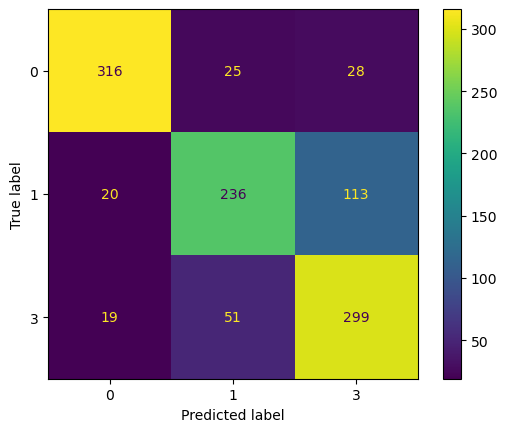

In [9]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(model_sgd, X_train, y_train, cv=5)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_train, y_pred=y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_sgd.classes_)
disp.plot()

In [10]:
import pickle
with open("victim_classifier.pkl", "wb") as f:
    pickle.dump(model_sgd, f)

print("Modelo salvo")

Modelo salvo


#### Faria leitura do modelo para predições

In [11]:
with open('victim_classifier.pkl', "rb") as f:
    model = pickle.load(f)

output = model.predict([some_image])
print(output)

[3]


c:\Users\josen\anaconda3\envs\tadsml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
